# Load Words and Create Master Dictionary

This section of code loads the data (which must be in the same directory as this file). It then concatinates 
the words to form a list called "dictionary".  This dictionary will be mater dictionary (2499 words) for the 
Wordle games.  

In [1]:
import csv

dictionary = []

with open('5_letters.csv', 'r') as file:
    reader = csv.reader(file)
    listlist = list(reader)
    
for i in range(len(listlist)-1):
    dictionary.append(''.join(listlist[i+1]))
    
#testdict = []

#for i in range(200):
    #testdict.append(''.join(listlist[i+1]))

#print(testdict)


In [4]:
dictionary[:3]

['aback', 'abase', 'abate']

In [5]:
def wordle_feedback(target_word, guess_word):
    green = [(i, g) for i, (t, g) in enumerate(zip(target_word, guess_word)) if t == g]
    remaining = [(i, t, g) for i, (t, g) in enumerate(zip(target_word, guess_word)) if t != g]
    
    remaining_target = [t for i, t, g in remaining]
    yellow = []
    black = []

    for i, t, g in remaining:
        if g in remaining_target:
            yellow.append((i, g))
            remaining_target.remove(g)  # Remove the letter from the target list so it can't be used again
        else:
            black.append((i, g))

    return {"green": green, "yellow": yellow, "black": black}


def is_consistent(word, feedback):
    # Create list from word and a copy for yellow check
    word_list = list(word)
    remaining_letters = word_list.copy()

    # 'green' checks: correct letter must be at the correct index
    for index, letter in feedback['green']:
        if word_list[index] != letter:
            return False
        remaining_letters.remove(letter)  # Mark as used

    # 'yellow' checks: correct letter can't be at the same index, but must exist elsewhere
    for index, letter in feedback['yellow']:
        if word_list[index] == letter or letter not in remaining_letters:
            return False
        remaining_letters.remove(letter)  # Mark as used

    # 'black' checks: letter must not be in the word at all
    for index, letter in feedback['black']:
        if letter in remaining_letters:
            return False

    return True

def nextguess(d):
    #find a key with a maximum value.  Choose randomly if there is a tie
    
    import random
    
    max_val = max(d.values())
    keys_with_max_val = [key for key, value in d.items() if value == max_val]
    return random.choice(keys_with_max_val)

In [7]:
 
{key: 0 for key in dictionary} #create dictionary

{'aback': 0,
 'abase': 0,
 'abate': 0,
 'abaya': 0,
 'abbey': 0,
 'abbot': 0,
 'abets': 0,
 'abhor': 0,
 'abide': 0,
 'abode': 0,
 'abort': 0,
 'about': 0,
 'above': 0,
 'abuse': 0,
 'abuts': 0,
 'abyss': 0,
 'ached': 0,
 'aches': 0,
 'acids': 0,
 'acing': 0,
 'ackee': 0,
 'acorn': 0,
 'acres': 0,
 'acrid': 0,
 'acted': 0,
 'actin': 0,
 'actor': 0,
 'acute': 0,
 'adage': 0,
 'adapt': 0,
 'added': 0,
 'adder': 0,
 'addle': 0,
 'adept': 0,
 'adieu': 0,
 'adios': 0,
 'adits': 0,
 'adman': 0,
 'admin': 0,
 'admit': 0,
 'adobe': 0,
 'adobo': 0,
 'adopt': 0,
 'adore': 0,
 'adorn': 0,
 'adult': 0,
 'adzes': 0,
 'aegis': 0,
 'aeons': 0,
 'aerie': 0,
 'affix': 0,
 'afire': 0,
 'afoot': 0,
 'afore': 0,
 'after': 0,
 'again': 0,
 'agape': 0,
 'agate': 0,
 'agave': 0,
 'agent': 0,
 'aggro': 0,
 'agile': 0,
 'aging': 0,
 'aglow': 0,
 'agony': 0,
 'agora': 0,
 'agree': 0,
 'ahead': 0,
 'ahold': 0,
 'aided': 0,
 'aider': 0,
 'aides': 0,
 'ailed': 0,
 'aimed': 0,
 'aimer': 0,
 'aioli': 0,
 'aired': 0,

In [6]:
def create_Qtable(dictionary):
    
    dict = {key: 0 for key in dictionary} #create dictionary
    
    for key1 in dict: #step through potential target words
        for key2 in dict: #step through each word in dictrionary
            
            feedback = wordle_feedback(key1, key2) #feedback for traget key1 compared with guess key2
            
            for key3 in dict: #computing reduction in length of dictionary by chosing key1 for each key2
                
                inconsistent = 0 #reset counter 
                
                if not is_consistent(key3, feedback):
                    inconsistent += 1 #counting how many words are eliminated from dicationary 
                    
                dict[key2] = dict[key2] + inconsistent #updates key2 for reduction in length of dictionary
                #Updating Qtable
        
    return(dict)
            


# You don't have to run this block.  It takes 2+ hours.  The answer is "cares".

In [10]:
my_dict = create_Qtable(dictionary)

KeyboardInterrupt: 

In [ ]:


max_value = max(my_dict.values())
keys_with_max_value = [key for key, value in my_dict.items() if value == max_value]

print(keys_with_max_value) #this will output "cares"

In [9]:
my_dict 

NameError: name 'my_dict' is not defined

# You don't have to run this block of code.  It requires the block above to complete. I will sent the json file if you want to upload it and look at the Qtable that it generated.  

In [69]:
#saving Qtable.

import json


# Writing to sample.json
with open('Qtable.json', 'w') as file:
    json.dump(my_dict, file)

# Run this block.  This is the main code.  You do need to run the code above that has the appropriate functions. It takes about 30 minutes to complete on my old computer.

In [11]:
#playing all possible games of Wordle give dictionary

#uploading dictionary
import csv

dictionary = []

record = []

with open('5_letters.csv', 'r') as file:
    reader = csv.reader(file)
    listlist = list(reader)
    
for i in range(len(listlist)-1):
    dictionary.append(''.join(listlist[i+1]))
    
    
for word in dictionary:
    
    print("Word: ", word)
    
    print("cares")
    
    feedback = wordle_feedback(word, "cares")
    
    remaining_dict = []
    
    for wordtest in dictionary:
        if is_consistent(wordtest, feedback):
            remaining_dict.append(wordtest)
            
    Qtable = create_Qtable(remaining_dict)
    
    guess = nextguess(Qtable)
    remaining_dict.remove(guess)
    
    print(guess)
    
    for i in range(2,55):
        
        feedback = wordle_feedback(word, guess)
        
        if len(feedback['green']) == 5:
            print(i, "tries")
            record.append(i)
            break
            
        temp = []
            
        for wordtest in remaining_dict:    
            if is_consistent(wordtest, feedback):
                temp.append(wordtest)
                
        remaining_dict = temp
            
        Qtable = create_Qtable(remaining_dict)
    
        guess = nextguess(Qtable)
    
        print(guess)
        remaining_dict.remove(guess)
    
    
    print(record)


Word:  aback
cares
ancho
aback
3 tries


In [ ]:
print(record)

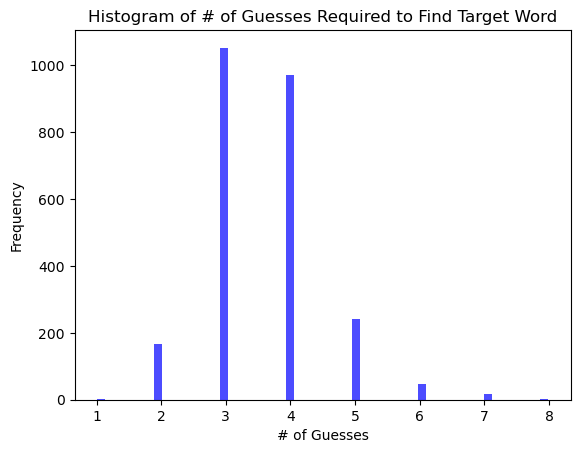

Mean: 3.601840736294518
Number of guesses >= 7: 20
Average streak: 125.0


In [136]:
import matplotlib.pyplot as plt

# Example list of numerical data
data = record

data.append(int(1))
data.remove(int(2))

# Generate the histogram
plt.hist(data, bins='auto', color='blue', alpha=0.7, rwidth=0.85)

# Customize the histogram (optional)
plt.title('Histogram of # of Guesses Required to Find Target Word')
plt.xlabel('# of Guesses')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

import statistics

# Calculate the mean using statistics.mean()
mean_value = statistics.mean(data)

print("Mean:", mean_value)

# Initialize a counter variable to count elements >= 7
count_greater_than_or_equal_to_7 = 0

# Loop through the list and count elements >= 7
for num in data:
    if num >= 7:
        count_greater_than_or_equal_to_7 += 1

print("Number of guesses >= 7:", count_greater_than_or_equal_to_7)

print("Average streak:", 2500/count_greater_than_or_equal_to_7)


In [ ]:
#Uploading Qtable for 1st guess 

import json

# Read JSON file
with open('Qtable.json', 'r') as file:
    my_dict = json.load(file)

# Now, my_dict is a Python dictionary
print(my_dict)
